<a href="https://colab.research.google.com/github/Juxtpawan/Deep-Learning-Repo/blob/main/ANN%26CNNCifer10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 - 16s - 53ms/step - accuracy: 0.1005 - loss: 17.6140 - val_accuracy: 0.0952 - val_loss: 2.3030
Epoch 2/20
313/313 - 18s - 57ms/step - accuracy: 0.1001 - loss: 2.3033 - val_accuracy: 0.0952 - val_loss: 2.3025
Epoch 3/20
313/313 - 22s - 70ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3024
Epoch 4/20
313/313 - 14s - 43ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3026
Epoch 5/20
313/313 - 13s - 43ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3026
Epoch 6/20
313/313 - 21s - 66ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.0979 - val_loss: 2.3027
Epoch 7/20
313/313 - 13s - 41ms/step - accuracy: 0.0974 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3028
Epoch 8/20
313/313 - 14s - 46ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.0978 - val_loss: 2.3027
Epoch 9/20
313/313 - 20s - 63ms/step - accuracy: 0.1002 - loss: 2.3025 - val_accuracy: 0.0952 -

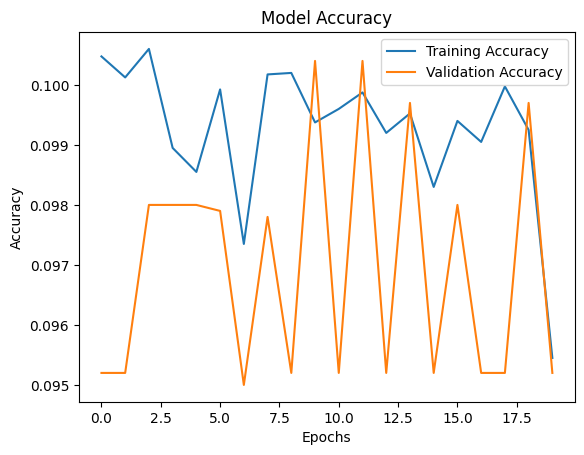

In [ ]:
# importing libraries
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# loading cifer10 dataset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

# Normalising pixel value
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Defining ANN Model
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:",test_loss, test_acc)


# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10
313/313 - 87s - 277ms/step - accuracy: 0.4435 - loss: 1.7453 - val_accuracy: 0.5297 - val_loss: 1.4385
Epoch 2/10
313/313 - 78s - 251ms/step - accuracy: 0.5651 - loss: 1.3280 - val_accuracy: 0.5669 - val_loss: 1.3099
Epoch 3/10
313/313 - 84s - 268ms/step - accuracy: 0.6143 - loss: 1.1615 - val_accuracy: 0.5983 - val_loss: 1.2242
Epoch 4/10
313/313 - 84s - 270ms/step - accuracy: 0.6485 - loss: 1.0623 - val_accuracy: 0.5898 - val_loss: 1.2895
Epoch 5/10
313/313 - 138s - 440ms/step - accuracy: 0.6747 - loss: 0.9838 - val_accuracy: 0.5167 - val_loss: 1.7259
Epoch 6/10
313/313 - 81s - 257ms/step - accuracy: 0.6978 - loss: 0.9164 - val_accuracy: 0.6794 - val_loss: 1.0034
Epoch 7/10
313/313 - 81s - 259ms/step - accuracy: 0.7181 - loss: 0.8534 - val_accuracy: 0.6684 - val_loss: 1.0587
Epoch 8/10
313/313 - 80s - 256ms/step - accuracy: 0.7357 - loss: 0.8032 - val_accuracy: 0.6764 - val_loss: 1.0202
Epoch 9/10
313/313 - 81s - 259ms/step - accuracy: 0.7547 - loss: 0.7500 - val_accuracy:

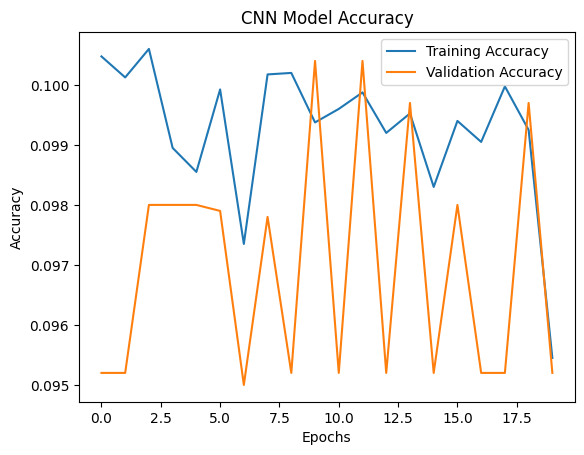

In [ ]:
# CNN Model on Cifer10

# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# loading cifer10 dataset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

# Normalising pixel value
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential([

    # with stride 2 test accuracy-57%
    # with stride 1 test accuracy - nearly 70%
    # with strie 1 and kernel_size 2*2 and weight random >> test accuracy - 66%
    Conv2D(32, (2,2), activation='relu',strides=1, padding='same',
           kernel_initializer =keras.initializers.RandomNormal ,kernel_regularizer=keras.regularizers.l2, input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (2,2), activation='relu', strides=1, padding='same',kernel_initializer =keras.initializers.RandomNormal,kernel_regularizer=keras.regularizers.l2, input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=2)
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss={test_loss} , Test accuracy = {test_acc}",test_loss, test_acc)


# Plotting accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()